<a href="https://colab.research.google.com/github/jucardozo/Clasificador-de-Ropa/blob/main/TP1RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabajo Práctico 1

Juan Cardozo 60530


# EDA

In [ ]:
#Inclusion de librerias útiles
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import cv2
import albumentations as A
from tensorflow.keras.optimizers import SGD,AdamW
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Codigo.

In [ ]:
#sentencias de importacion de input-output y google colab files
import io
from google.colab import files

uploaded = files.upload()
data_trainDF = pd.read_csv(io.BytesIO(uploaded['train_labels.csv']))
data_train = data_trainDF.values
# El filename es el nombre del archivo.

from google.colab import drive
drive.mount("/content/drive/")

Saving train_labels.csv to train_labels.csv
Mounted at /content/drive/


In [ ]:

data_train.shape
data_train=data_train.reshape(60000)
data_train.shape
y_train=data_train
print(type(data_train))

## x_train -> Imagees 
##y_train -> Labels

<class 'numpy.ndarray'>


In [ ]:
#Descargar set de datos de Fashion MNIST //despues ver como poner los del profe

#datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)(con datos directos de fashion Mnist)
imagenes=np.load('/content/drive/MyDrive/Dataset tp redes neuronales/fashion-mnist-itba-lab-2023q1/train_images.npy')
x_test=np.load('/content/drive/MyDrive/Dataset tp redes neuronales/fashion-mnist-itba-lab-2023q1/test_images.npy')
#Imprimir los metadatos para ver que trae el set




Funciones Secundarias.


In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(imagenes, data_train , test_size=0.1, random_state=50)

x_train = list(imagenes[:len(X_train)])

new_labels=list(data_train[:len(X_train)])

#Funciones Utilizadas para hacer el data aumentation
def gen_imagen_FLIP(imagenes,etiquetas):
  for i in range(len(imagenes)):
    transform = A.HorizontalFlip(p=0.5)
    random.seed(7)
    x_train.append(transform(image=imagenes[i])['image'])
    new_labels.append(data_train[i])
    
def gen_imagen_ROTATE(imagenes,etiquetas):   
  for i in range(len(imagenes)):
    transform = A.RandomRotate90(p=0.5)
    random.seed(7)
    x_train.append(transform(image=imagenes[i])['image'])
    new_labels.append(data_train[i])
    
#Funcion para normalizar la entrada 
#Hace que la red aprenda mejor y mas rapido
def normalizar(imagenes):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui lo pasa de 0-255 a 0-1


#Ejecucion de las mismas
gen_imagen_FLIP(imagenes,list(data_train))
gen_imagen_ROTATE(imagenes,list(data_train))
x_train=np.array(x_train)
normalizar(x_train) 


Visualizacion de algunos de los datos de entrada 

0


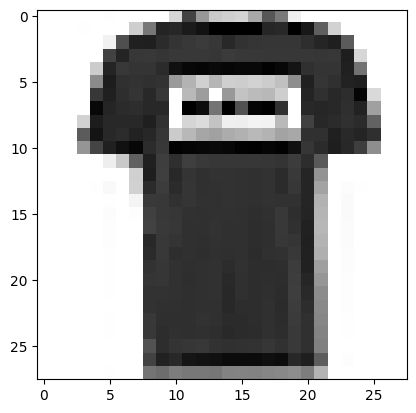

In [ ]:
print(data_train[1]) #dato crudo
plt.imshow(imagenes[1],cmap=plt.cm.binary)

Dato luego del data aumentation

174000
174000
6


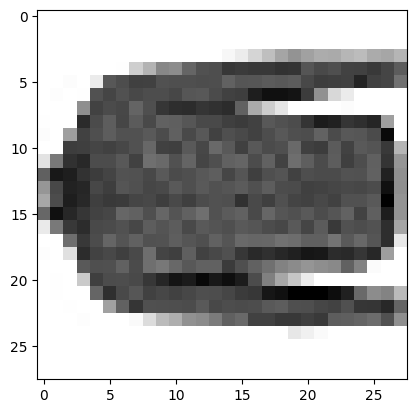

In [ ]:
#Chusmeo el dato, Normalizado
print(len(new_labels))
print(len(x_train))
print(new_labels[120001])
plt.imshow(x_train[120001],cmap=plt.cm.binary)

In [ ]:
#hacer algo pa mostrar todo

Distribución de los Datos de entrada

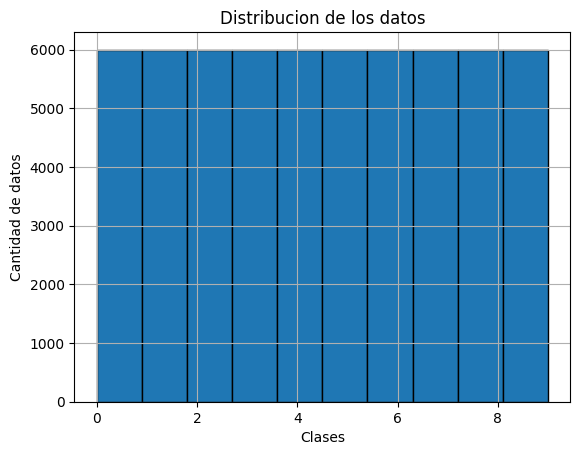

In [ ]:
plt.hist(data_train,edgecolor='black')
plt.xlabel("Clases")
plt.ylabel("Cantidad de datos")
plt.title("Distribucion de los datos")
plt.grid()

In [ ]:
y_sparse_train = np.zeros([len(x_train),10])
y_sparse_val = np.zeros([len(X_val),10])
for idx in range(len(x_train)):
    y_sparse_train[idx,new_labels[idx]] = 1
for idx in range(len(X_val)):
    y_sparse_val[idx,y_val[idx]] = 1


# SOFTMAX

PRIMERA RED NEURONAL 

SOLO CON EL USO DE LA CAPA SOFTMAX.

In [ ]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [ ]:
#Compilo el modelo

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
)

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
#datos = datos.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128,validation_data=(X_val, y_sparse_val) ,epochs=10)


Epoch 1/10
1360/1360 [==============================] - 8s 3ms/step - loss: 18.8182 - accuracy: 0.6458 - val_loss: 10.4966 - val_accuracy: 0.7027
Epoch 2/10
1360/1360 [==============================] - 4s 3ms/step - loss: 10.2827 - accuracy: 0.6936 - val_loss: 8.2977 - val_accuracy: 0.7042
Epoch 3/10
1360/1360 [==============================] - 4s 3ms/step - loss: 8.1320 - accuracy: 0.6977 - val_loss: 8.2965 - val_accuracy: 0.6927
Epoch 4/10
1360/1360 [==============================] - 4s 3ms/step - loss: 7.1625 - accuracy: 0.6996 - val_loss: 5.7891 - val_accuracy: 0.6943
Epoch 5/10
1360/1360 [==============================] - 4s 3ms/step - loss: 6.7602 - accuracy: 0.6969 - val_loss: 7.4029 - val_accuracy: 0.6482
Epoch 6/10
1360/1360 [==============================] - 5s 4ms/step - loss: 6.5770 - accuracy: 0.6984 - val_loss: 5.0504 - val_accuracy: 0.7157
Epoch 7/10
1360/1360 [==============================] - 4s 3ms/step - loss: 5.8173 - accuracy: 0.7012 - val_loss: 8.2607 - val_accura

ALGUNOS GRAFICOS REPRESENTATIVOS

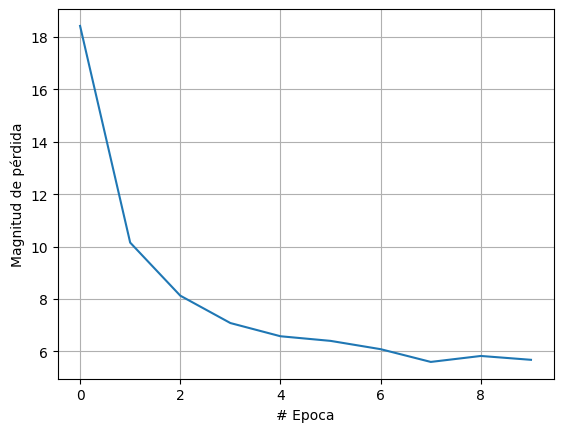

In [ ]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

METRICAS SECUNDARIAS

In [ ]:
#AREA BAJO LA CURVA ROC => NO ENTIENDO SI SOBRE QUE TEST LO HAGO.
predictions_test = modelo.predict(X_val)
roc_auc_score(y_sparse_val, predictions_test)


188/188 [==============================] - 0s 2ms/step


0.9577030985583826

In [ ]:
#F1_Score => Misma duda qye el anterios.
metric = tf.keras.metrics.Precision(thresholds=0.5)
metric.update_state(y_sparse_val, predictions_test)
presicion = metric.result()
print(presicion.numpy())
metric = tf.keras.metrics.Recall(thresholds=0.5)
metric.update_state(y_sparse_val, predictions_test)
recall = metric.result()
print(recall.numpy())
f1_Score=(2*(presicion*recall))/(presicion+recall)
print("f1 score:", f1_Score.numpy())

0.67921054
0.67683333
f1 score: 0.6780199


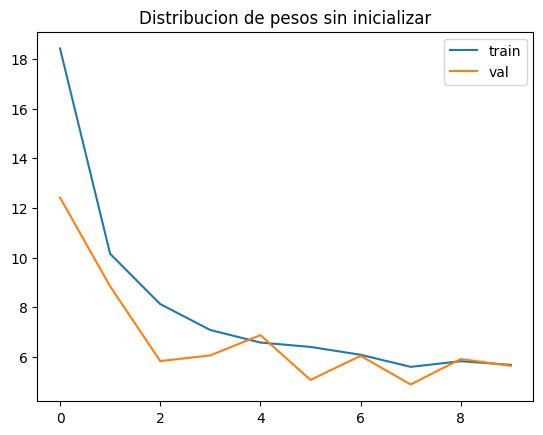

In [ ]:
plt.plot(historial.history["loss"], label="train")
plt.plot(historial.history["val_loss"], label="val")
plt.legend()
plt.show()

(784, 10)
[ 0.2827867  -4.070218   -0.6533595  -0.41746923 -2.7189095  11.262999
  0.67362046  0.2934259  -2.785999   -2.1232152 ]


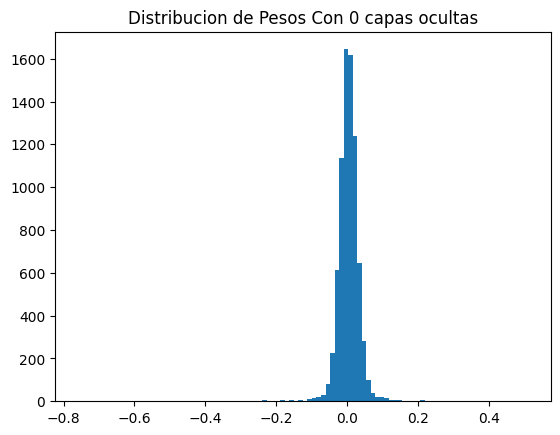

In [ ]:
weights = modelo.get_weights()[0]
biases = modelo.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title("Distribucion de Pesos Con 0 capas ocultas")
plt.show()

RED NEURONAL CON OPTIMIZADOR SGD LEARNING RATE (0.0001)

In [ ]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])
modelo.compile(
    optimizer=SGD(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Epoch 1/20
1407/1407 [==============================] - 5s 3ms/step - loss: 27.7246 - accuracy: 0.5974
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 18.5836 - accuracy: 0.6664
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 16.6664 - accuracy: 0.6788
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 16.0063 - accuracy: 0.6830
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 15.6276 - accuracy: 0.6854
Epoch 6/20
1407/1407 [==============================] - 5s 3ms/step - loss: 15.5536 - accuracy: 0.6851
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 15.1664 - accuracy: 0.6883
Epoch 8/20
1407/1407 [==============================] - 4s 3ms/step - loss: 15.0932 - accuracy: 0.6880
Epoch 9/20
1407/1407 [==============================] - 4s 3ms/step - loss: 15.0154 - accuracy: 0.6890
Epoch 10/20
1407/1407 [==============================] - 6s 4ms/step - lo

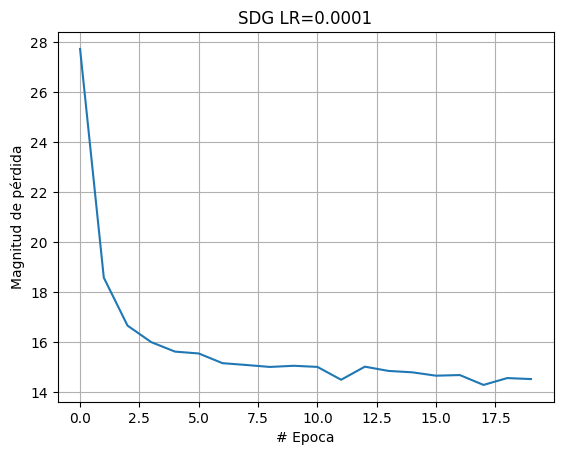

In [ ]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.title("SDG LR=0.0001")
plt.plot(historial.history["loss"])

INICIALIZADORES DE PESO

In [ ]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(10,kernel_initializer=tf.keras.initializers.GlorotUniform(),activation=tf.nn.softmax) #Para redes de clasificacion
])
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]

)
modelo.summary()
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1407/1407 [==============================] - 5s 3ms/step - loss: 18.1106 - accuracy: 0.6505
Epoch 2/20
1407/1407 [==============================] - 5s 3ms/step - loss: 10.2238 - accuracy: 0.6935
Epoch 3/20
1407/1407 [==============================] - 12s 9ms/step - loss: 8.0767 - accuracy: 0.6985
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 7.0506 - accuracy: 0.6996
Epoch 5/20
1407/1407 [===============

(784, 10)
[ 0.23495899 -4.0482526  -0.6413828  -0.4086125  -2.701649   11.250431
  0.70352787  0.345405   -2.8210375  -2.1509635 ]


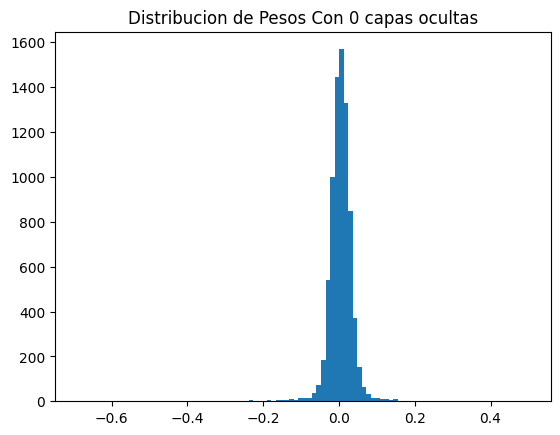

In [ ]:
weights = modelo.get_weights()[0]
biases = modelo.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title("Distribucion de Pesos Con 0 capas ocultas")
plt.show()

CON BATCH NORMALIZATION.

In [ ]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.BatchNormalization(momentum=0.99),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax,use_bias=False) #Para redes de clasificacion
])
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Epoch 1/20
1407/1407 [==============================] - 10s 6ms/step - loss: 0.7418 - accuracy: 0.7523
Epoch 2/20
1407/1407 [==============================] - 6s 5ms/step - loss: 0.6403 - accuracy: 0.7872
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6301 - accuracy: 0.7912
Epoch 4/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6229 - accuracy: 0.7940
Epoch 5/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6196 - accuracy: 0.7948
Epoch 6/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6172 - accuracy: 0.7951
Epoch 7/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6183 - accuracy: 0.7958
Epoch 8/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6147 - accuracy: 0.7955
Epoch 9/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6127 - accuracy: 0.7967
Epoch 10/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.61

RED NEURONAL VARIANDO EL TAMAÑO DE LA RED
1 CAPA OCULTA Y 50 NEURONAS

In [ ]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(50,kernel_initializer=tf.keras.initializers.GlorotUniform(), activation=tf.nn.relu,),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [ ]:
#Compilo el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
#datos = datos.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 50)                39250     
                                                                 
 dense_13 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Epoch 1/20
1407/1407 [==============================] - 9s 5ms/step - loss: 2.4077 - accuracy: 0.3794
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2158 - accuracy: 0.5308
Epoch 3/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9497 - accuracy: 0.6338
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8134 - accuracy: 0.6851
Epoch 5/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.7426 - accuracy: 0.7179
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6695 - accuracy: 0.7525
Epoch 7/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.6405 - accuracy: 0.7669
Epoch 8/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6208 - accuracy: 0.7752
Epoch 9/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.6082 - accuracy: 0.7842
Epoch 10/20
1407/1407 [==============================] - 11s 8ms/step - loss: 0.

NameError: ignored

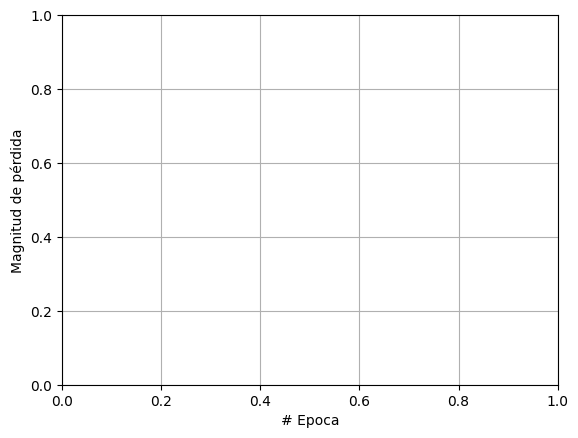

In [ ]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
weights = modelo.get_weights()[0]
biases = modelo.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title("Distribucion de Pesos Con 1 capas ocultas")
plt.show()

RED NEURONAL VARIANDO EL TAMAÑO DE LA RED 2 CAPAS OCULTA 

In [ ]:

modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(50,kernel_initializer=tf.keras.initializers.GlorotUniform(), activation=tf.nn.relu,kernel_constraint=tf.keras.constraints.max_norm(5)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(50,kernel_initializer=tf.keras.initializers.GlorotUniform(), activation=tf.nn.relu,),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [ ]:
#Compilo el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

modelo.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_59 (Dense)            (None, 50)                39250     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_60 (Dense)            (None, 50)                2550      
                                                                 
 dense_61 (Dense)            (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Epoch 1/20
1360/1360 [==============================] - 7s 5ms/step - loss: 2.4129 - accuracy: 0.2543
Epoch 2/20
1360/1360 [==============================] - 7s 5ms/step - loss: 1.5882 - accuracy: 0.3921
Epoch 3/20
1360/1360 [==============================] - 12s 9ms/step - loss: 1.3963 - accuracy: 0.4692
Epoch 4/20
1360/1360 [==============================] - 7s 5ms/step - loss: 1.3255 - accuracy: 0.4968
Epoch 5/20
1360/1360 [==============================] - 7s 5ms/step - loss: 1.2938 - accuracy: 0.5071
Epoch 6/20
1360/1360 [==============================] - 10s 7ms/step - loss: 1.2771 - accuracy: 0.5133
Epoch 7/20
1293/1360 [===========================>..] - ETA: 0s - loss: 1.2644 - accuracy: 0.5166

KeyboardInterrupt: ignored

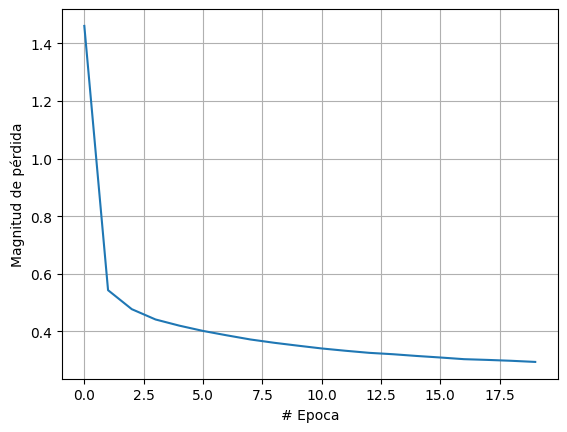

In [ ]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.title("3 capas ocultas")
plt.plot(historial.history["loss"])

(784, 100)
[-0.03653021 -0.36047825 -0.00574688  1.0632966   0.15935615  0.5855867
  0.10118582  0.04135606  0.29700303 -0.03898719 -0.01004581  0.35864657
 -0.41641736 -0.38348863 -0.8948317   0.68006575 -0.02186318  0.01165112
  0.03617122  0.39640886  0.59585226 -0.09600474  0.34843028 -0.48415184
  0.962139   -0.01470059  0.60989714 -0.01464317 -0.03075193 -0.12864493
  0.02574267  0.14332029 -0.02788151  0.34195635 -0.23921394 -0.09114224
 -0.02342991  0.15885642 -0.03751089 -0.00161368  0.782914    1.2503536
 -0.05001778 -0.03713719 -0.02150723  0.22513042 -0.2056638   1.0094874
 -0.01556539  0.3354785   0.11527677  1.255847   -0.04523151  0.00309731
 -0.00613005 -0.13160822 -0.10379614 -0.03987812  0.10164009 -0.01810879
  0.48242638  0.720295    0.72048616 -0.0713077   0.57231164 -0.47565585
  0.02972009 -0.02495301  0.07483909 -0.05621171  0.12846391 -0.01791814
  0.01981926  0.54518336  0.39188758  0.47408947 -0.03547711 -0.01351697
  0.6726929   0.33308953  0.7839705   0.097

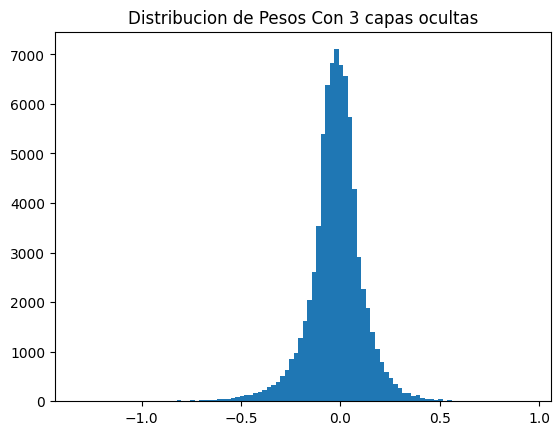

In [ ]:
weights = modelo.get_weights()[0]
biases = modelo.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title("Distribucion de Pesos Con 3 capas ocultas")
plt.show()

FUNCIONES DE ACTIVACION DISTINTAS A LA RELU. 

In [ ]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(100, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(100, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(50, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])
#Compilo el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

modelo.summary()
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
Total params: 94,160
Trainable params: 94,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1407/1407 [============================

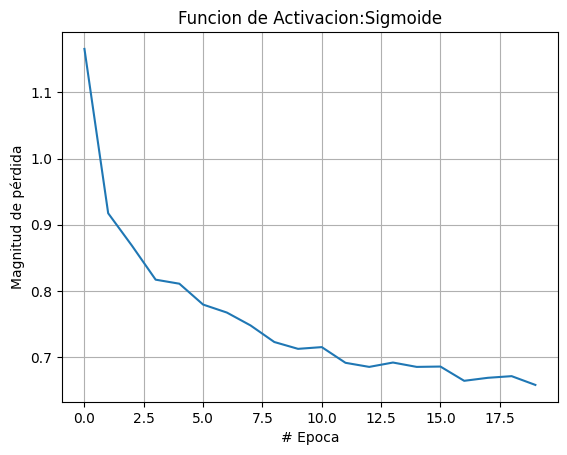

In [ ]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.title("Funcion de Activacion:Sigmoide")
plt.plot(historial.history["loss"])

In [ ]:
modelo.load_weights('one-hidden-last.mnist.hdf5')
modelo.evaluate(x_train, y_train_categorical)

SyntaxError: ignored

# MLP


**RED NEURONAL DE MEJOR PERFOMANCE . TEST 0.89:**
  
  La red de mejor desempeño constaba de dos capas de 500 neuronas , con una capa de entrada tipo *FLATTEN* y una de salida tipo *SOFTMAX*, tambien se destaca el uso de los *batch normalization* como asi tambien del *dropout*, pero con el fin de agilizar los tiempo de ejecución, se lo cambio por una red de 100 neuronas en cada capa. Tambien , se dejo de usar la tecnica de *dropout* por que al ser una red chica, la performance se ve afectada.

Doble Capa , Con optimizador Adam , Batch Normalization , dropoutop

In [ ]:
#Creo el modelo
modelo = tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.BatchNormalization(momentum=0.99),
  tf.keras.layers.Dense(500,kernel_constraint = tf.keras.constraints.max_norm(5),kernel_initializer=tf.keras.initializers.GlorotUniform(), activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(momentum=0.99),
  tf.keras.layers.Dense(500,kernel_constraint = tf.keras.constraints.max_norm(5),kernel_initializer=tf.keras.initializers.GlorotUniform(),activation=tf.nn.relu),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.BatchNormalization(momentum=0.99),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])


In [ ]:
#Compilo el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['Accuracy']
)
modelo.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_38 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_58 (Dense)            (None, 500)               392500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 batch_normalization_39 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 dense_59 (Dense)            (None, 500)             

In [ ]:
#Entrenar
earlyStopping =tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=0.9,
    restore_best_weights=False,
)
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 200, validation_data=(X_val, y_sparse_val),epochs=20)#,verbose=0)
acc=np.array(historial.history["val_Accuracy"])

#for idx, value in enumerate(acc):
#  if value > 0.9:
#    print(idx)


Epoch 1/20
870/870 [==============================] - 7s 5ms/step - loss: 0.5168 - Accuracy: 0.8181 - val_loss: 0.3322 - val_Accuracy: 0.8765
Epoch 2/20
870/870 [==============================] - 5s 5ms/step - loss: 0.3779 - Accuracy: 0.8626 - val_loss: 0.2820 - val_Accuracy: 0.8945
Epoch 3/20
870/870 [==============================] - 4s 5ms/step - loss: 0.3351 - Accuracy: 0.8778 - val_loss: 0.2531 - val_Accuracy: 0.9057
Epoch 4/20
870/870 [==============================] - 4s 5ms/step - loss: 0.3102 - Accuracy: 0.8853 - val_loss: 0.2405 - val_Accuracy: 0.9103
Epoch 5/20
870/870 [==============================] - 5s 6ms/step - loss: 0.2907 - Accuracy: 0.8915 - val_loss: 0.2244 - val_Accuracy: 0.9135
Epoch 6/20
870/870 [==============================] - 4s 5ms/step - loss: 0.2742 - Accuracy: 0.8975 - val_loss: 0.2133 - val_Accuracy: 0.9185
Epoch 7/20
870/870 [==============================] - 4s 5ms/step - loss: 0.2602 - Accuracy: 0.9033 - val_loss: 0.2014 - val_Accuracy: 0.9238
Epoch 

**PREDICCION Y EVALUCION**

In [ ]:
y_test = modelo.predict(x_test)
labels = np.array([np.argmax(prediction) for prediction in y_test])
submission=pd.DataFrame({"id": np.arange(10000) , "Category" : labels})
submission.to_csv("submission.csv",index=False)


313/313 [==============================] - 2s 6ms/step


**MEDIDAS SECUNDARIAS, F1 score, Curva ROC** 

*AREA BAJO LA CURVA ROC*


In [ ]:

predictions_test = modelo.predict(X_val)
roc_auc_score(y_sparse_val, predictions_test)


188/188 [==============================] - 1s 3ms/step


0.9986476722814823

*F1_SCORE, RECALL Y PRESICION*

In [ ]:

metric = tf.keras.metrics.Precision(thresholds=0.5)
metric.update_state(y_sparse_val, predictions_test)
presicion = metric.result()
print("presicion:",presicion.numpy())
metric = tf.keras.metrics.Recall(thresholds=0.5)
metric.update_state(y_sparse_val, predictions_test)
recall = metric.result()
print("recall:",recall.numpy())
f1_Score=(2*(presicion*recall))/(presicion+recall)
print("f1 score:", f1_Score.numpy())

presicion: 0.9628821
recall: 0.9555
f1 score: 0.95917684


**GRAFICOS DE INTEREZ**

(784,)
[ 7.43871868e-01  2.64156330e-02  2.54342318e-01  1.75061420e-01
  2.13830471e-01  3.74827862e-01  2.71920264e-01  5.54421246e-01
  1.40992031e-01  4.89637077e-01  1.41631961e-01  6.39652535e-02
  3.76049370e-01  3.89095932e-01  5.38214207e-01  5.22704348e-02
  2.19741657e-01 -1.63620263e-02  3.93361747e-01  2.48496115e-01
  4.00312185e-01  4.58470613e-01  3.94954205e-01  1.81613982e-01
  3.59467596e-01  2.40708873e-01  7.95566291e-02  7.54946396e-02
  3.47638965e-01  1.73556358e-01  4.58538890e-01  3.07686031e-01
  2.98999429e-01  4.12279665e-01  5.44809580e-01  4.31911767e-01
  6.92110002e-01  1.31952330e-01  2.68964291e-01  1.68132693e-01
 -5.26068397e-02  4.15916324e-01  3.67509335e-01  3.70614752e-02
 -1.70862988e-01  1.91304445e-01 -5.53878509e-02  3.10581952e-01
  4.00737226e-01  1.92495793e-01  6.90790713e-02  2.83001009e-02
 -1.28790096e-03  3.57291758e-01  1.16706468e-01  2.09230036e-01
  7.74622709e-02  2.52304256e-01  9.62598324e-02  1.02488145e-01
  4.16389465e-01  

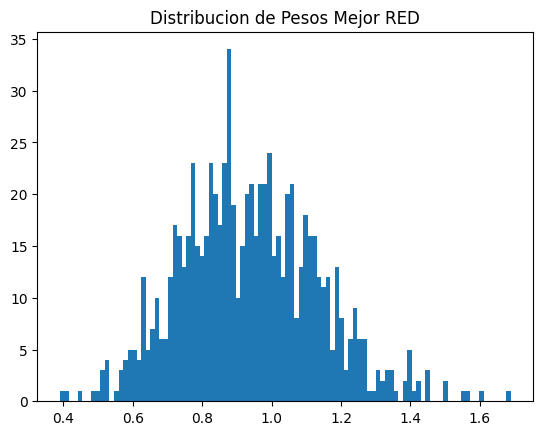

In [ ]:
weights = modelo.get_weights()[0]
biases = modelo.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title("Distribucion de Pesos Mejor RED")
plt.show()

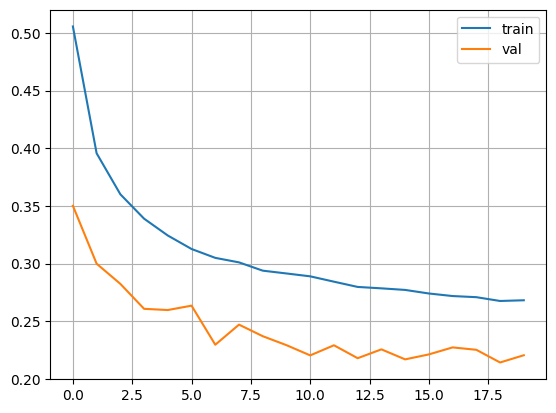

In [ ]:
plt.plot(historial.history["loss"], label="train")
plt.plot(historial.history["val_loss"], label="val")
plt.legend()
plt.grid()
plt.show()

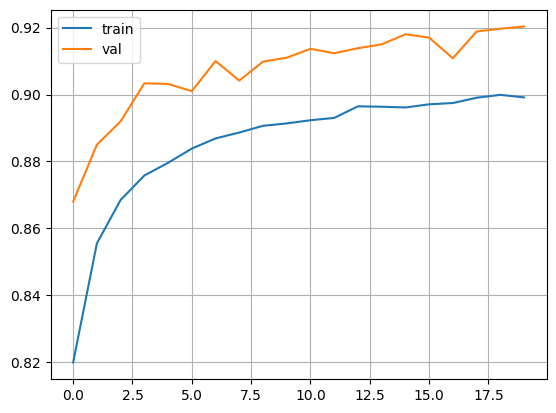

In [ ]:
plt.plot(historial.history["Accuracy"], label="train")
plt.plot(historial.history["val_Accuracy"], label="val")
plt.grid()
plt.legend()
plt.show()

**ACCURACY VS VARIACIONES DE DISTINTOS PARAMETROS**

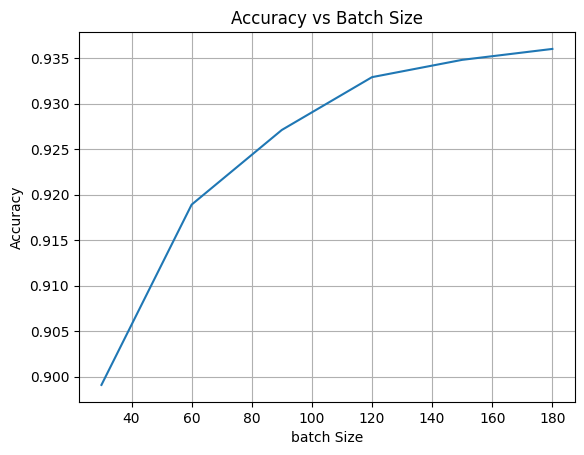

In [ ]:
x=[30,60,90,120,150,180]
y=[0.8991,0.9189,0.9271,0.9329,0.9348,0.9360]
plt.plot(x,y)
plt.xlabel('batch Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Batch Size')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Accuracy vs Inicializadores')

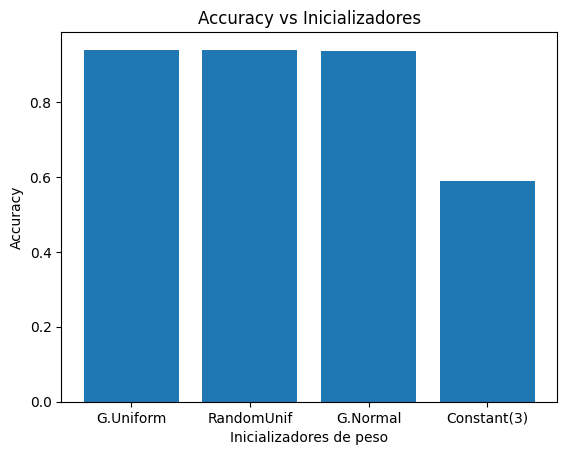

In [ ]:
accuracy=[0.9391,0.9377,0.9368,0.5882]
inicializ=['G.Uniform','RandomUnif','G.Normal','Constant(3)']
plt.bar(inicializ, accuracy)
plt.xlabel("Inicializadores de peso")
plt.ylabel("Accuracy")
plt.ylimit(5,0)
plt.title("Accuracy vs Inicializadores")


Text(0.5, 1.0, 'Accuracy vs F.Activacion')

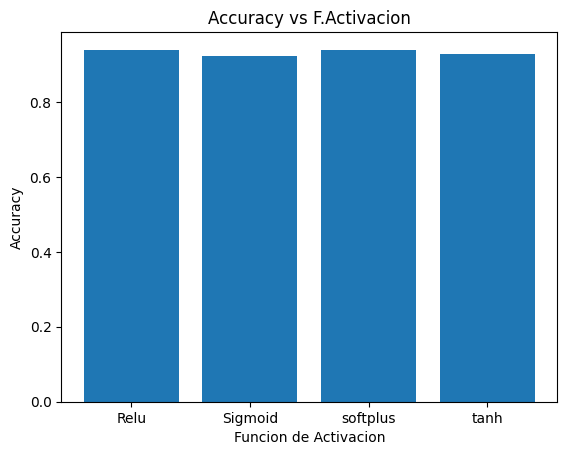

In [ ]:
accuracy=[0.9391,0.9225,0.9380,0.9284]
inicializ=['Relu','Sigmoid','softplus','tanh']
plt.bar(inicializ, accuracy)
plt.xlabel("Funcion de Activacion")
plt.ylabel("Accuracy")
plt.title("Accuracy vs F.Activacion")


Text(0.5, 1.0, 'Accuracy vs Learning Rate')

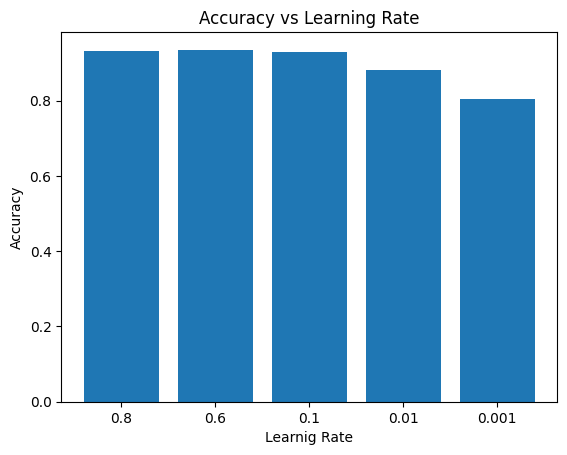

In [ ]:
accuracy=[0.9323,0.9349,0.9282,0.8804,0.8029]
inicializ=['0.8','0.6','0.1','0.01','0.001']
plt.bar(inicializ, accuracy)
plt.xlabel("Learnig Rate")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Learning Rate")

**EPOCH VS VARIACIONES DE DISTINTOS PARAMETROS**

  PARA PODER TENER UNA OBSERVACION MÁS SIGNIFICATIVA DE LOS EPOCHS, SE PUSO UN THRESHOLD A LOS 0.9 DE VAL_ACCURACY. DE ESTA MANERA SABEMOS CUANTAS EPOCHS TARDARON EN LLEGAR A DICHA CONDICION. 
  ADEMAS, PARA EL RESTO DE LAS COMPARACIONES , SE MANTIENE LA CONDICION DE MEJOR PERFORMANCE , SOLAMENTE VARIANDO LA QUE SE QUIERE MOSTRAR.

Text(0.5, 1.0, 'Epoch vs Optimizador')

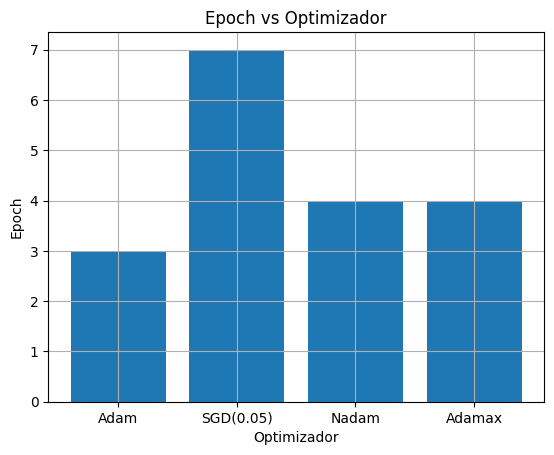

In [ ]:
Epoch=[6,7,4,4]
inicializ=['Adam','SGD(0.05)','Nadam','Adamax']
plt.bar(inicializ, Epoch)
plt.xlabel("Optimizador")
plt.ylabel("Epoch")
plt.grid()
plt.title("Epoch vs Optimizador")

Text(0.5, 1.0, 'Epoch vs Optimizador')

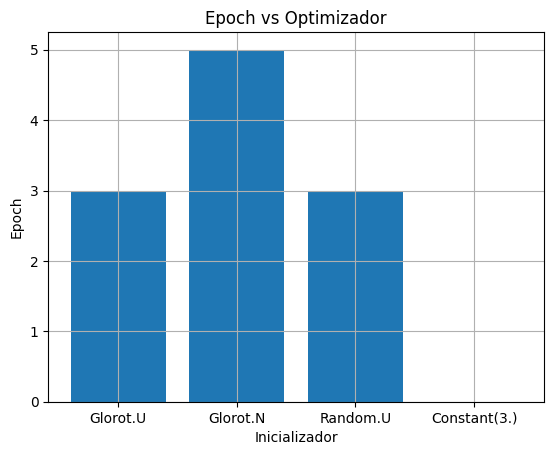

In [ ]:
Epoch=[3,5,3,0]
inicializ=['Glorot.U','Glorot.N','Random.U','Constant(3.)']
plt.bar(inicializ, Epoch)
plt.xlabel("Inicializador")
plt.ylabel("Epoch")
plt.grid()
plt.title("Epoch vs Inicializador")

Text(0.5, 1.0, 'Epoch vs Activacion')

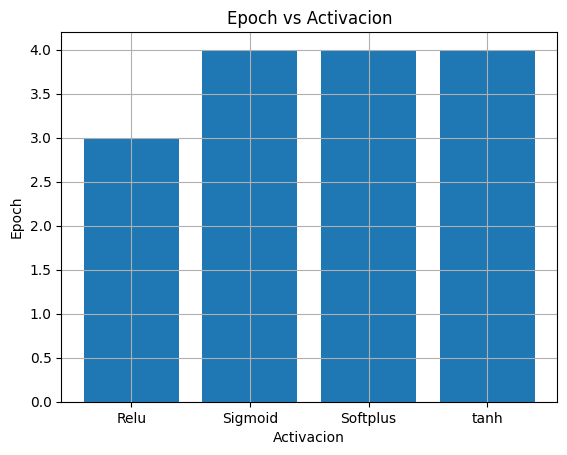

In [ ]:
Epoch=[3,4,4,4]
inicializ=['Relu','Sigmoid','Softplus','tanh']
plt.bar(inicializ, Epoch)
plt.xlabel("Activacion")
plt.ylabel("Epoch")
plt.grid()
plt.title("Epoch vs Activacion")

Text(0.5, 1.0, 'Epoch vs Learning Rate')

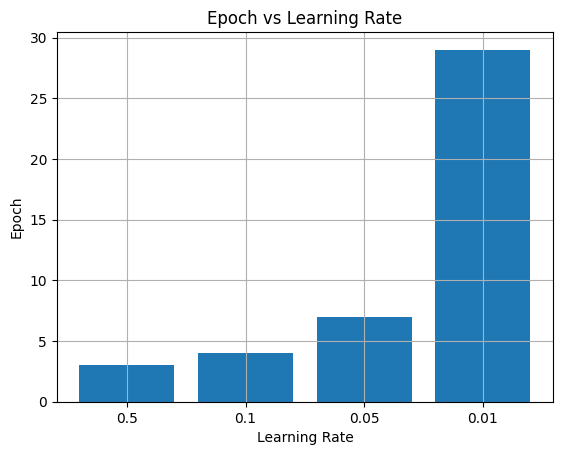

In [ ]:
Epoch=[3,4,7,29]
inicializ=['0.5','0.1','0.05','0.01']
plt.bar(inicializ, Epoch)
plt.xlabel("Learning Rate")
plt.ylabel("Epoch")
plt.grid()
plt.title("Epoch vs Learning Rate")

**Iniciso 4**

In [ ]:
.clear_session()
model_wo_training = keras.models.load_model("model_without_training")
model_w_training = keras.models.load_model("trained_model")


# Calculate weight differences
initial_weights = model_wo_training.get_weights()
final_weights = model_w_training.get_weights()

weight_diff = [np.abs(initial - final) for initial, final in zip(initial_weights, final_weights)]

# Flatten and sort weight differences
flattened_diff = np.concatenate([arr.flatten() for arr in weight_diff])
sorted_indices = np.argsort(flattened_diff)[::-1]

# Determine the threshold value for the top 50% weights
threshold_index = int(len(sorted_indices) * 0.5)
threshold = flattened_diff[sorted_indices[threshold_index]]

# Set weights above the threshold to their initial values, and the rest to zero
modified_weights = []
for initial, final in zip(initial_weights, final_weights):
    mask = np.abs(final - initial) >= threshold
    modified_weights.append(np.where(mask, initial, 0.0))

final_model = keras.models.load_model("model_without_training")
final_model.set_weights(modified_weights)


In [ ]:
##MultiLayer Perceptron
import warnings

from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
def normalizar(imagenes):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui lo pasa de 0-255 a 0-1

datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
#normalizar(datos)
X_train, X_test, y_train, y_test = train_test_split(datos,metadatos, random_state=0, test_size=0.7)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(100,75,50, 10), random_state=1)
clf.fit(X_train, y_train)
#mlp = MLPClassifier(
#    hidden_layer_sizes=(40,),
 #   max_iter=8,
  #  alpha=1e-4,
  #  solver="lbfgs",
   # verbose=10,
  #  random_state=1,
  #  learning_rate_init=0.2,
#)
#with warnings.catch_warnings():
 #   warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
#mlp.fit(x_train, y_train)
print("Training set score: %f" % clf.score(X, y))

ValueError: ignored

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 